# Training CNN model to predict Mask and No Mask  (Images)



In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

2.4.3
2.3.0


In [21]:
train_data_path = "D:\\mask detection\\dataset\\train"
validation_data_path = "D:\\mask detection\\dataset\\valid"   ## single slashes are changed to double slashes

In [22]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [23]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3649 images belonging to 2 classes.


In [24]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [25]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


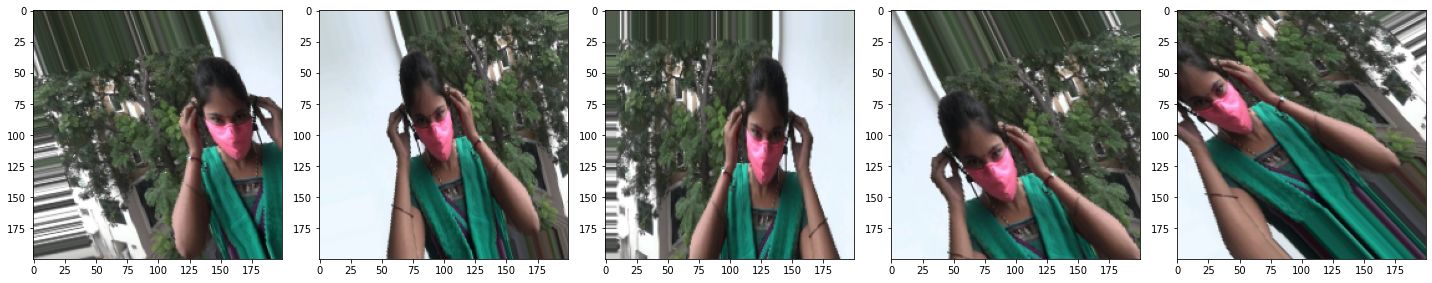

In [26]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [27]:
# save best model using vall accuracy
model_path = 'D:\\mask detection\\model\\modelr.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [28]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network buiklding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/50
 7/29 [======>.......................] - ETA: 1:50 - loss: 0.7014 - accuracy: 0.5525

c:\users\rakshit\appdata\local\programs\python\python38\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - ETA: 0s - loss: 0.5416 - accuracy: 0.7106
Epoch 00001: val_accuracy improved from -inf to 0.91439, saving model to D:\mask detection\model\modelr.h5
29/29 [==============================] - 173s 6s/step - loss: 0.5416 - accuracy: 0.7106 - val_loss: 0.2425 - val_accuracy: 0.9144
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 0.3394 - accuracy: 0.8665
Epoch 00002: val_accuracy improved from 0.91439 to 0.93424, saving model to D:\mask detection\model\modelr.h5
29/29 [==============================] - 134s 5s/step - loss: 0.3394 - accuracy: 0.8665 - val_loss: 0.1996 - val_accuracy: 0.9342
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.8994
Epoch 00003: val_accuracy did not improve from 0.93424
29/29 [==============================] - 133s 5s/step - loss: 0.2867 - accuracy: 0.8994 - val_loss: 0.1927 - val_accuracy: 0.9330
Epoch 4/50
29/29 [==============================] - ETA: 0s - loss:

Epoch 29/50
29/29 [==============================] - ETA: 0s - loss: 0.1579 - accuracy: 0.9400
Epoch 00029: val_accuracy did not improve from 0.97643
29/29 [==============================] - 133s 5s/step - loss: 0.1579 - accuracy: 0.9400 - val_loss: 0.0982 - val_accuracy: 0.9615
Epoch 30/50
29/29 [==============================] - ETA: 0s - loss: 0.1716 - accuracy: 0.9383
Epoch 00030: val_accuracy did not improve from 0.97643
29/29 [==============================] - 133s 5s/step - loss: 0.1716 - accuracy: 0.9383 - val_loss: 0.0791 - val_accuracy: 0.9727
Epoch 31/50
29/29 [==============================] - ETA: 0s - loss: 0.1784 - accuracy: 0.9345
Epoch 00031: val_accuracy did not improve from 0.97643
29/29 [==============================] - 134s 5s/step - loss: 0.1784 - accuracy: 0.9345 - val_loss: 0.0853 - val_accuracy: 0.9739
Epoch 32/50
29/29 [==============================] - ETA: 0s - loss: 0.1505 - accuracy: 0.9457
Epoch 00032: val_accuracy did not improve from 0.97643
29/29 [===

In [30]:
cnn_model.save('D:\\mask detection\\model\\model_lastr.h5')

In [31]:
# train cnn model-----second time same thing so don't do this again
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 0.1122 - accuracy: 0.9589
Epoch 00001: val_accuracy did not improve from 0.98387
29/29 [==============================] - 59s 2s/step - loss: 0.1122 - accuracy: 0.9589 - val_loss: 0.0572 - val_accuracy: 0.9801
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9567
Epoch 00002: val_accuracy did not improve from 0.98387
29/29 [==============================] - 60s 2s/step - loss: 0.1205 - accuracy: 0.9567 - val_loss: 0.0583 - val_accuracy: 0.9801
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 0.1118 - accuracy: 0.9581
Epoch 00003: val_accuracy did not improve from 0.98387
29/29 [==============================] - 61s 2s/step - loss: 0.1118 - accuracy: 0.9581 - val_loss: 0.0565 - val_accuracy: 0.9839
Epoch 4/50
29/29 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.9586
Epoch 00004: val_accuracy did not improve from 0.98387
29/29 [==========

Epoch 30/50
29/29 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9646
Epoch 00030: val_accuracy did not improve from 0.99256
29/29 [==============================] - 60s 2s/step - loss: 0.0984 - accuracy: 0.9646 - val_loss: 0.0362 - val_accuracy: 0.9851
Epoch 31/50
29/29 [==============================] - ETA: 0s - loss: 0.1019 - accuracy: 0.9616
Epoch 00031: val_accuracy did not improve from 0.99256
29/29 [==============================] - 60s 2s/step - loss: 0.1019 - accuracy: 0.9616 - val_loss: 0.0305 - val_accuracy: 0.9901
Epoch 32/50
29/29 [==============================] - ETA: 0s - loss: 0.1013 - accuracy: 0.9660
Epoch 00032: val_accuracy did not improve from 0.99256
29/29 [==============================] - 59s 2s/step - loss: 0.1013 - accuracy: 0.9660 - val_loss: 0.0410 - val_accuracy: 0.9901
Epoch 33/50
29/29 [==============================] - ETA: 0s - loss: 0.0796 - accuracy: 0.9704
Epoch 00033: val_accuracy did not improve from 0.99256
29/29 [======

In [32]:
cnn_model.save('D:\\mask detection\\model\\model_lastr.h5')

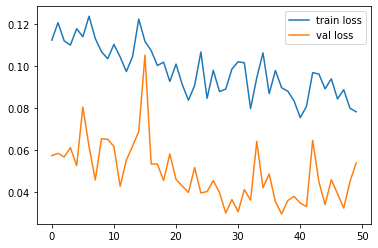

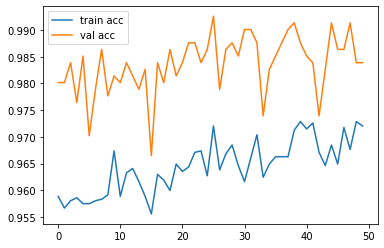

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history.history['loss'], label='train loss')
plt.plot(cnn_model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn_model.history.history['accuracy'], label='train acc')
plt.plot(cnn_model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')